# Week10 Classification & Decision Tree

We continued learning other algorithms of Supervised Learning. Classification belongs to the category of supervised learning where the targets also provided with the input data. 

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

A decision tree is a largely used non-parametric effective machine learning modeling technique for regression and classification problems. To find solutions a decision tree makes sequential, hierarchical decision about the outcomes variable based on the predictor data.

In week10, we've covered:
* **Logistic Regression, Stochastic Gradient Descent**
* **Decision Tree**


The best way to consolidate the knowledge in your mind is by practicing.<br>Please complete the part marked with <span style="color:green">**# TODO**</span>.

[Google](www.google.com), [Python Documentation](https://docs.python.org/3/contents.html), and [scikit-learn Documentation](https://scikit-learn.org/stable/) are your good friends if you have any python questions.

Download **Week10_classification-and-decision-tree.ipynb** notebook to your local folder and open it with Jupyter Notebook.

### Data Loading and EDA

Install Python SciPy libraries (ex. `numpy`, `pandas`, `matplotlib`, `seaborn`)
    

Notes to instructors, I found that I needed to do the following to make some pieces of this work:

* brew install libomp
* brew install graphviz
* L1 and L2 logistc each need solvers to complete their work. If you don't specify, a solver will be called that is not implements for L1. See the notes below for a solver that works for both.
* I think the GraphViz visualization of the decision tree looks great, but we don't have much indication of that for the participants. Maybe include this in breakouts?





In [1]:
# TODO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

%matplotlib inline

Load Data

In [2]:
# TODO
wine = pd.read_csv('winequality-red.csv')

Summarize the dataset -- we are going to take a look at the data in a few different ways:
1. Dimensions of the dataset (Hint: use `shape`)
2. Peek at the data itself (Hint: use `head`)
3. Statistical summary of all attributes (Hint: use `describe`)
4. Breakdown of the data by the class variable (Hint: use `groupby`, `value_counts`)


In [3]:
# TODO
wine.shape
wine.head()
wine.describe()
wine.groupby("quality").mean()
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Data visualization -- use seaborn to plot graphs to help you better understand this dataset

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

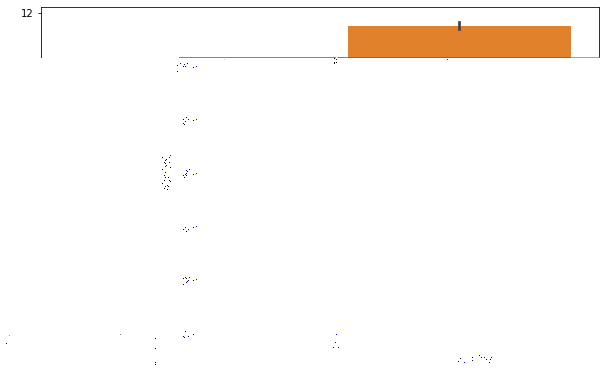

In [4]:
# TODO
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

### Data Preprocessing

Check for missing values, do you think this step is necessary and why?

In [5]:
# TODO
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Can you think of some ways to handle missing values?

In [6]:
# TODO
# missing value imputation with mean or 0

Seperate the dataset as response variable and feature variabes

In [7]:
# TODO
X = wine.drop('quality', axis = 1)
y = wine['quality']

Split to training set and testing set (Note: test_size = 0.25, random_state = 42)

In [8]:
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Apply Standard scaling to get optimized result, think of why we need to do this?

In [9]:
# TODO
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Modeling

#### Logistic Regression

Train a Binary Classifier and fit with training set

In [10]:
# TODO
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Perform predictions on test data

In [10]:
# Todo
y_pred = lr.predict(X_test)

We've learned that there are some caveats in the train/test split method. In order to avoid this, we can perform something called cross validation. Try K-Fold Cross Validation (ex. 10-fold)

In [12]:
# Todo
kfold = KFold(n_splits=10)
cv_result = cross_val_score(lr,X_train,y_train, cv = kfold,scoring = "accuracy")
cv_result

array([0.825     , 0.88333333, 0.88333333, 0.9       , 0.85833333,
       0.84166667, 0.875     , 0.9       , 0.85833333, 0.94107647])

Print out Confusion Matrix and explain the Four Quadrants

In [13]:
# Todo
confusion_matrix(y_test,y_pred)

array([[336,  10],
       [ 37,  16]], dtype=int64)

What's AUC for your Logistic Regression model?

In [14]:
# Todo
roc_auc_score(y_test,y_pred)

0.6350932521341961

#### Regularized Logistic Regression

Build a Binary Classifier with a L2 Regularizer and print out its Confusion Matrix

In [15]:
# NOTE: For both questions that follow, use solver = 'liblinear' 
# More on why here at the docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [16]:
# Todo
l2=LogisticRegression(penalty='l2',solver = 'liblinear')
l2.fit(X_train, y_train)
confusion_matrix(y_test,l2.predict(X_test))

array([[336,  10],
       [ 37,  16]], dtype=int64)

Build a Binary Classifier with a L1 Regularizer and print out its Confusion Matrix

In [17]:
# Todo
l1=LogisticRegression(penalty='l1',solver = 'liblinear')
l1.fit(X_train, y_train)
confusion_matrix(y_test,l1.predict(X_test))

array([[338,   9],
       [ 37,  16]], dtype=int64)

What's the difference between L1 regularization and L2 regularization?

In [18]:
# Todo
print('L2 Logistic Regression AUC: %f' %roc_auc_score(y_test,l2.predict(X_test)))
print('L1 Logistic Regression AUC: %f' % roc_auc_score(y_test,l1.predict(X_test)))
# different regularizers, L1 often results in many weights being exactly 0 while L2 just makes them small but nonzero

L2 Logistic Regression AUC: 0.635093
L1 Logistic Regression AUC: 0.637975


#### SGD

Fit a SGD model and perform predictions on test set

In [19]:
# Todo
sgd=SGDClassifier(random_state=0)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

#### Decision Tree

Build a Decision Tree Classifier and perform predictions on test set

In [20]:
# TODO
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred_tree_test = tree.predict(X_test)
y_pred_tree_train = tree.predict(X_train)

In [21]:
#test set
confusion_matrix(y_test,y_pred_tree_test)

array([[322,  25],
       [ 23,  30]], dtype=int64)

In [22]:
#training set
confusion_matrix(y_train,y_pred_tree_train)

array([[1035,    0],
       [   0,  164]], dtype=int64)

Is there an overfitting issue? How can you tell and how could you solve it?

***Yes, model never makes a mistake on the training set. We should be training with cross validation.***

In [23]:
# TODO
features = list(X.columns)
dot_data=export_graphviz(tree,feature_names = features,filled=True, rounded=True, impurity=False)
#graph = graphviz.Source(dot_data)
#graph

In [24]:
params = {'max_leaf_nodes': list(range(2, 50)),
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': list(range(5, 20))}
grid_cv=GridSearchCV(DecisionTreeClassifier(random_state=0),params,n_jobs=-1,verbose=1)
grid_cv.fit(X_train, y_train)
grid_cv.best_estimator_

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


DecisionTreeClassifier(max_leaf_nodes=3, min_samples_leaf=5, random_state=0)

### Model Comparison

How would you evaluate and compare model performance?

In [25]:
# TODO
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("SGDClassifier:",SGDClassifier()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("XGBoost:",XGBClassifier(use_label_encoder=False)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 87.66176470588235
SGDClassifier: 85.24369747899159
Naive Bayes: 83.48459383753502
Decision Tree: 88.32773109243698
Random Forest: 88.99579831932775
XGBoost: 90.66386554621847
AdaBoostClassifier: 87.82773109243698
GradientBoostingClassifier: 89.32843137254902


## Submission

Commit your completed **Week10_classification-and-decision-tree.ipynb** notebook to your personal Github repo you shared with the faculty.